## 부산시 주유소 유가 데이터 전처리
#### 기간 : 20220214~20220809
#### 주차별 평균으로 사용

In [1]:
import pandas as pd
import numpy as np

In [2]:
#데이터 불러오기 
data = pd.read_csv("./data/부산시 주유소 유가 데이터(20220209-20220809).csv", index_col=1, encoding="utf-8")
data

,번호,상호,주소,기간,상표,셀프여부,휘발유,경유
지역,,,,,,,,
부산 강서구,A0033158,(주)DJS신항만물류단지주유소,부산 강서구 가락대로 834 (범방동),20220214,S-OIL,셀프,1638,1508
부산 강서구,A0033158,(주)DJS신항만물류단지주유소,부산 강서구 가락대로 834 (범방동),20220215,S-OIL,셀프,1638,1518
부산 강서구,A0033158,(주)DJS신항만물류단지주유소,부산 강서구 가락대로 834 (범방동),20220216,S-OIL,셀프,1668,1518
부산 강서구,A0033158,(주)DJS신항만물류단지주유소,부산 강서구 가락대로 834 (범방동),20220217,S-OIL,셀프,1678,1528
부산 강서구,A0033158,(주)DJS신항만물류단지주유소,부산 강서구 가락대로 834 (범방동),20220218,S-OIL,셀프,1678,1538
...,...,...,...,...,...,...,...,...
부산 해운대구,A0031437,현대오일뱅크㈜직영 센텀셀프주유소,부산 해운대구 해운대로 179 (재송동),20220805,현대오일뱅크,셀프,1810,1920
부산 해운대구,A0031437,현대오일뱅크㈜직영 센텀셀프주유소,부산 해운대구 해운대로 179 (재송동),20220806,현대오일뱅크,셀프,1810,1920
부산 해운대구,A0031437,현대오일뱅크㈜직영 센텀셀프주유소,부산 해운대구 해운대로 179 (재송동),20220807,현대오일뱅크,셀프,1810,1920


In [3]:
#인덱스 생성
data.reset_index(inplace=True)

#### 데이터 확인

In [264]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67411 entries, 0 to 67410
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지역      67411 non-null  object
 1   번호      67411 non-null  object
 2   상호      67411 non-null  object
 3   주소      67411 non-null  object
 4   기간      67411 non-null  int64 
 5   상표      67411 non-null  object
 6   셀프여부    67411 non-null  object
 7   휘발유     67411 non-null  int64 
 8   경유      67411 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 4.6+ MB


In [265]:
data.head()

,지역,번호,상호,주소,기간,상표,셀프여부,휘발유,경유
0,부산 강서구,A0033158,(주)DJS신항만물류단지주유소,부산 강서구 가락대로 834 (범방동),20220214,S-OIL,셀프,1638,1508
1,부산 강서구,A0033158,(주)DJS신항만물류단지주유소,부산 강서구 가락대로 834 (범방동),20220215,S-OIL,셀프,1638,1518
2,부산 강서구,A0033158,(주)DJS신항만물류단지주유소,부산 강서구 가락대로 834 (범방동),20220216,S-OIL,셀프,1668,1518
3,부산 강서구,A0033158,(주)DJS신항만물류단지주유소,부산 강서구 가락대로 834 (범방동),20220217,S-OIL,셀프,1678,1528
4,부산 강서구,A0033158,(주)DJS신항만물류단지주유소,부산 강서구 가락대로 834 (범방동),20220218,S-OIL,셀프,1678,1538


In [266]:
data.isnull().sum()

지역      0
번호      0
상호      0
주소      0
기간      0
상표      0
셀프여부    0
휘발유     0
경유      0
dtype: int64

In [267]:
data.describe()

,기간,휘발유,경유
count,6.741100e+04,67411.000000,67411.000000
mean,2.022051e+07,1944.169601,1915.648099
std,1.704899e+02,163.496779,170.126046
min,2.022021e+07,0.000000,0.000000
25%,2.022033e+07,1897.000000,1859.000000
50%,2.022051e+07,1965.000000,1928.000000
75%,2.022063e+07,2030.000000,2035.000000
max,2.022081e+07,2385.000000,2438.000000


In [4]:
#휘발유 0값 추출
data[data["휘발유"] == 0].head()

,지역,번호,상호,주소,기간,상표,셀프여부,휘발유,경유
741,부산 강서구,A0027640,(주)비에스이강동주유소,부산 강서구 낙동북로 18 (강동동),20220323,현대오일뱅크,셀프,0,1899
6964,부산 강서구,A0027564,우리2주유소,부산 강서구 낙동북로 142 (강동동),20220404,S-OIL,셀프,0,0
6965,부산 강서구,A0027564,우리2주유소,부산 강서구 낙동북로 142 (강동동),20220405,S-OIL,셀프,0,0
17082,부산 기장군,A0031933,삼2주유소,부산 기장군 일광면 기장대로 1291,20220807,S-OIL,일반,0,1894
17083,부산 기장군,A0031933,삼2주유소,부산 기장군 일광면 기장대로 1291,20220808,S-OIL,일반,0,1879


In [269]:
#경유 0값 추출
len(data[data["경유"] == 0])

17

#### 연도별 주차 평균 데이터

In [5]:
#int64->object->datetime 타입변경
data['기간'] = pd.to_datetime(data['기간'].astype(str))
data

,지역,번호,상호,주소,기간,상표,셀프여부,휘발유,경유
0,부산 강서구,A0033158,(주)DJS신항만물류단지주유소,부산 강서구 가락대로 834 (범방동),2022-02-14,S-OIL,셀프,1638,1508
1,부산 강서구,A0033158,(주)DJS신항만물류단지주유소,부산 강서구 가락대로 834 (범방동),2022-02-15,S-OIL,셀프,1638,1518
2,부산 강서구,A0033158,(주)DJS신항만물류단지주유소,부산 강서구 가락대로 834 (범방동),2022-02-16,S-OIL,셀프,1668,1518
3,부산 강서구,A0033158,(주)DJS신항만물류단지주유소,부산 강서구 가락대로 834 (범방동),2022-02-17,S-OIL,셀프,1678,1528
4,부산 강서구,A0033158,(주)DJS신항만물류단지주유소,부산 강서구 가락대로 834 (범방동),2022-02-18,S-OIL,셀프,1678,1538
...,...,...,...,...,...,...,...,...,...
67406,부산 해운대구,A0031437,현대오일뱅크㈜직영 센텀셀프주유소,부산 해운대구 해운대로 179 (재송동),2022-08-05,현대오일뱅크,셀프,1810,1920
67407,부산 해운대구,A0031437,현대오일뱅크㈜직영 센텀셀프주유소,부산 해운대구 해운대로 179 (재송동),2022-08-06,현대오일뱅크,셀프,1810,1920
67408,부산 해운대구,A0031437,현대오일뱅크㈜직영 센텀셀프주유소,부산 해운대구 해운대로 179 (재송동),2022-08-07,현대오일뱅크,셀프,1810,1920
67409,부산 해운대구,A0031437,현대오일뱅크㈜직영 센텀셀프주유소,부산 해운대구 해운대로 179 (재송동),2022-08-08,현대오일뱅크,셀프,1810,1920


In [9]:
#연도별 주차 컬럼 생성
data["주차"] = data["기간"].dt.isocalendar().week

In [10]:
data.head(10)

,지역,번호,상호,주소,기간,상표,셀프여부,휘발유,경유,주차
0,부산 강서구,A0033158,(주)DJS신항만물류단지주유소,부산 강서구 가락대로 834 (범방동),2022-02-14,S-OIL,셀프,1638,1508,7
1,부산 강서구,A0033158,(주)DJS신항만물류단지주유소,부산 강서구 가락대로 834 (범방동),2022-02-15,S-OIL,셀프,1638,1518,7
2,부산 강서구,A0033158,(주)DJS신항만물류단지주유소,부산 강서구 가락대로 834 (범방동),2022-02-16,S-OIL,셀프,1668,1518,7
3,부산 강서구,A0033158,(주)DJS신항만물류단지주유소,부산 강서구 가락대로 834 (범방동),2022-02-17,S-OIL,셀프,1678,1528,7
4,부산 강서구,A0033158,(주)DJS신항만물류단지주유소,부산 강서구 가락대로 834 (범방동),2022-02-18,S-OIL,셀프,1678,1538,7
5,부산 강서구,A0033158,(주)DJS신항만물류단지주유소,부산 강서구 가락대로 834 (범방동),2022-02-19,S-OIL,셀프,1688,1538,7
6,부산 강서구,A0033158,(주)DJS신항만물류단지주유소,부산 강서구 가락대로 834 (범방동),2022-02-20,S-OIL,셀프,1688,1538,7
7,부산 강서구,A0033158,(주)DJS신항만물류단지주유소,부산 강서구 가락대로 834 (범방동),2022-02-21,S-OIL,셀프,1688,1538,8
8,부산 강서구,A0033158,(주)DJS신항만물류단지주유소,부산 강서구 가락대로 834 (범방동),2022-02-22,S-OIL,셀프,1688,1538,8
9,부산 강서구,A0033158,(주)DJS신항만물류단지주유소,부산 강서구 가락대로 834 (범방동),2022-02-23,S-OIL,셀프,1698,1548,8


#### 주차별 휘발유/경유 평균 가격 비교

In [11]:
#주차별 휘발유 평균 가격
weekly_avg_gasolin = data.groupby(["주차"])["휘발유"].mean().round()
weekly_avg_gasolin

주차
7     1688.0
8     1708.0
9     1747.0
10    1917.0
11    1996.0
12    1987.0
13    1975.0
14    1959.0
15    1947.0
16    1941.0
17    1944.0
18    1905.0
19    1921.0
20    1945.0
21    1976.0
22    2002.0
23    2031.0
24    2067.0
25    2095.0
26    2108.0
27    2084.0
28    2028.0
29    1956.0
30    1889.0
31    1836.0
32    1799.0
Name: 휘발유, dtype: float64

In [12]:
#DataFrame 형식으로 변경
weekly_avg_gasolin = pd.DataFrame(weekly_avg_gasolin)
weekly_avg_gasolin

,휘발유
주차,
7,1688.0
8,1708.0
9,1747.0
10,1917.0
11,1996.0
12,1987.0
13,1975.0
14,1959.0
15,1947.0


In [14]:
#컬럼명 변경
weekly_avg_gasolin.rename(columns={"휘발유" : "휘발유_평균가격"}, inplace=True)

In [15]:
#주차별 경유 평균 가격
weekly_avg_diesel = data.groupby(["주차"])["경유"].mean().round()
weekly_avg_diesel

주차
7     1526.0
8     1551.0
9     1588.0
10    1791.0
11    1900.0
12    1897.0
13    1889.0
14    1879.0
15    1876.0
16    1879.0
17    1892.0
18    1887.0
19    1925.0
20    1957.0
21    1977.0
22    1990.0
23    2029.0
24    2080.0
25    2115.0
26    2136.0
27    2121.0
28    2087.0
29    2030.0
30    1971.0
31    1930.0
32    1901.0
Name: 경유, dtype: float64

In [16]:
#DataFrame 형식으로 변경
weekly_avg_diesel = pd.DataFrame(weekly_avg_diesel)
weekly_avg_diesel

,경유
주차,
7,1526.0
8,1551.0
9,1588.0
10,1791.0
11,1900.0
12,1897.0
13,1889.0
14,1879.0
15,1876.0


In [17]:
#컬럼명 변경
weekly_avg_diesel.rename(columns={"경유" : "경유_평균가격"}, inplace=True)

In [18]:
#데이터 병합
all_weekly_avg_price = pd.merge(weekly_avg_gasolin, weekly_avg_diesel, how="inner", left_index=True, right_index=True)
all_weekly_avg_price

,휘발유_평균가격,경유_평균가격
주차,,
7,1688.0,1526.0
8,1708.0,1551.0
9,1747.0,1588.0
10,1917.0,1791.0
11,1996.0,1900.0
12,1987.0,1897.0
13,1975.0,1889.0
14,1959.0,1879.0
15,1947.0,1876.0


In [19]:
#시각화를 위해 평균가격 데이터 타입을 float에서 int로 변경
all_weekly_avg_price = all_weekly_avg_price.astype("int")

##### 주차별 평균가격 변화 추세 시각화

In [20]:
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
# 폰트 설정
font_path = "C:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc("font", family=font_name)

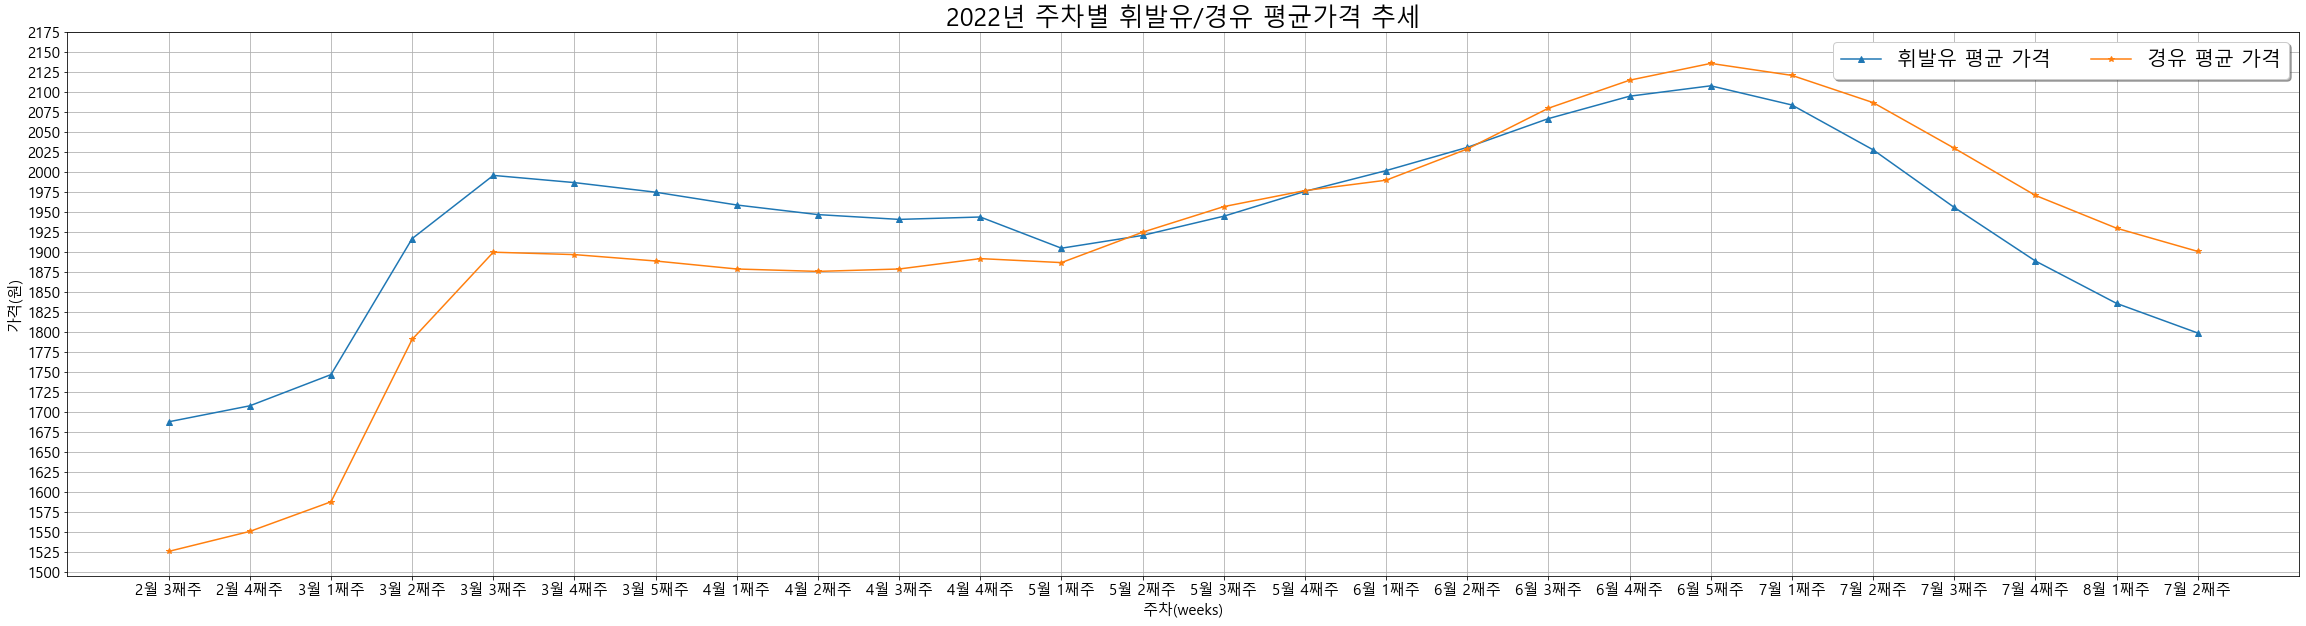

In [33]:
ax1 = all_weekly_avg_price.index
ax2 = all_weekly_avg_price.휘발유_평균가격
ax3 = all_weekly_avg_price.경유_평균가격

plt.figure(figsize=(40,10))
a = plt.plot(ax1, ax2, label="휘발유 평균 가격", marker="^") # 휘발유 평균 가격
b = plt.plot(ax1, ax3, label="경유 평균 가격", marker="*") # 경유 평균 가격
p = [a,b]

plt.title("2022년 주차별 휘발유/경유 평균가격 추세", fontsize=25)
plt.xticks(ax1, fontsize=15, labels=["2월 3째주","2월 4째주",
                                     "3월 1째주","3월 2째주","3월 3째주","3월 4째주","3월 5째주",
                                     "4월 1째주","4월 2째주","4월 3째주","4월 4째주",
                                     "5월 1째주","5월 2째주","5월 3째주","5월 4째주",
                                     "6월 1째주","6월 2째주","6월 3째주","6월 4째주","6월 5째주",
                                     "7월 1째주","7월 2째주","7월 3째주","7월 4째주",
                                     "8월 1째주","7월 2째주"]) # x축
plt.yticks(np.arange(1500, 2200, 25) ,fontsize=15) # y축
plt.xlabel("주차(weeks)", fontsize=15) #x 축 이름
plt.ylabel("가격(원)", fontsize=15) # y축 이름
plt.legend(loc="best",ncol=2, fontsize= 20, shadow=True) # 범례
plt.grid()

plt.show()

#### 상표별 휘발유/경유 평균 가격 비교

In [23]:
#상표별 휘발유 평균가격
brand_avg_gasolin = data.groupby(["상표"])["휘발유"].mean().round()
brand_avg_gasolin

상표
GS칼텍스     1943.0
NH-OIL    1915.0
S-OIL     1932.0
SK에너지     1963.0
알뜰주유소     1912.0
자가상표      1916.0
현대오일뱅크    1945.0
Name: 휘발유, dtype: float64

In [24]:
#DataFrame 형식으로 변경
brand_avg_gasolin = pd.DataFrame(brand_avg_gasolin)
brand_avg_gasolin

,휘발유
상표,
GS칼텍스,1943.0
NH-OIL,1915.0
S-OIL,1932.0
SK에너지,1963.0
알뜰주유소,1912.0
자가상표,1916.0
현대오일뱅크,1945.0


In [25]:
#컬럼명 변경
brand_avg_gasolin.rename(columns={"휘발유" : "휘발유_평균가격"}, inplace=True)

In [26]:
#상표별 경유 평균가격
brand_avg_diesel = data.groupby(["상표"])["경유"].mean().round()
brand_avg_diesel

상표
GS칼텍스     1908.0
NH-OIL    1882.0
S-OIL     1921.0
SK에너지     1931.0
알뜰주유소     1884.0
자가상표      1902.0
현대오일뱅크    1910.0
Name: 경유, dtype: float64

In [27]:
#DataFrame 형식으로 변경
brand_avg_diesel = pd.DataFrame(brand_avg_diesel)
brand_avg_diesel

,경유
상표,
GS칼텍스,1908.0
NH-OIL,1882.0
S-OIL,1921.0
SK에너지,1931.0
알뜰주유소,1884.0
자가상표,1902.0
현대오일뱅크,1910.0


In [28]:
#컬럼명 변경
brand_avg_diesel.rename(columns={"경유" : "경유_평균가격"}, inplace=True)

In [29]:
#데이터 병합
all_brand_avg_price = pd.merge(brand_avg_gasolin, brand_avg_diesel, how="inner", left_index=True, right_index=True)
all_brand_avg_price

,휘발유_평균가격,경유_평균가격
상표,,
GS칼텍스,1943.0,1908.0
NH-OIL,1915.0,1882.0
S-OIL,1932.0,1921.0
SK에너지,1963.0,1931.0
알뜰주유소,1912.0,1884.0
자가상표,1916.0,1902.0
현대오일뱅크,1945.0,1910.0


In [30]:
#시각화를 위해 평균가격 데이터 타입을 float에서 int로 변경
all_brand_avg_price = all_brand_avg_price.astype("int")

#### 상표별 평균 가격 비교(22년 2월14일 ~ 8월 9일) 시각화

In [47]:
w = 0.28 #widths
nrow = all_brand_avg_price.shape[0] #행의 갯수
idx = np.arange(nrow) #행의 갯수를 리스트로
idx


array([0, 1, 2, 3, 4, 5, 6])

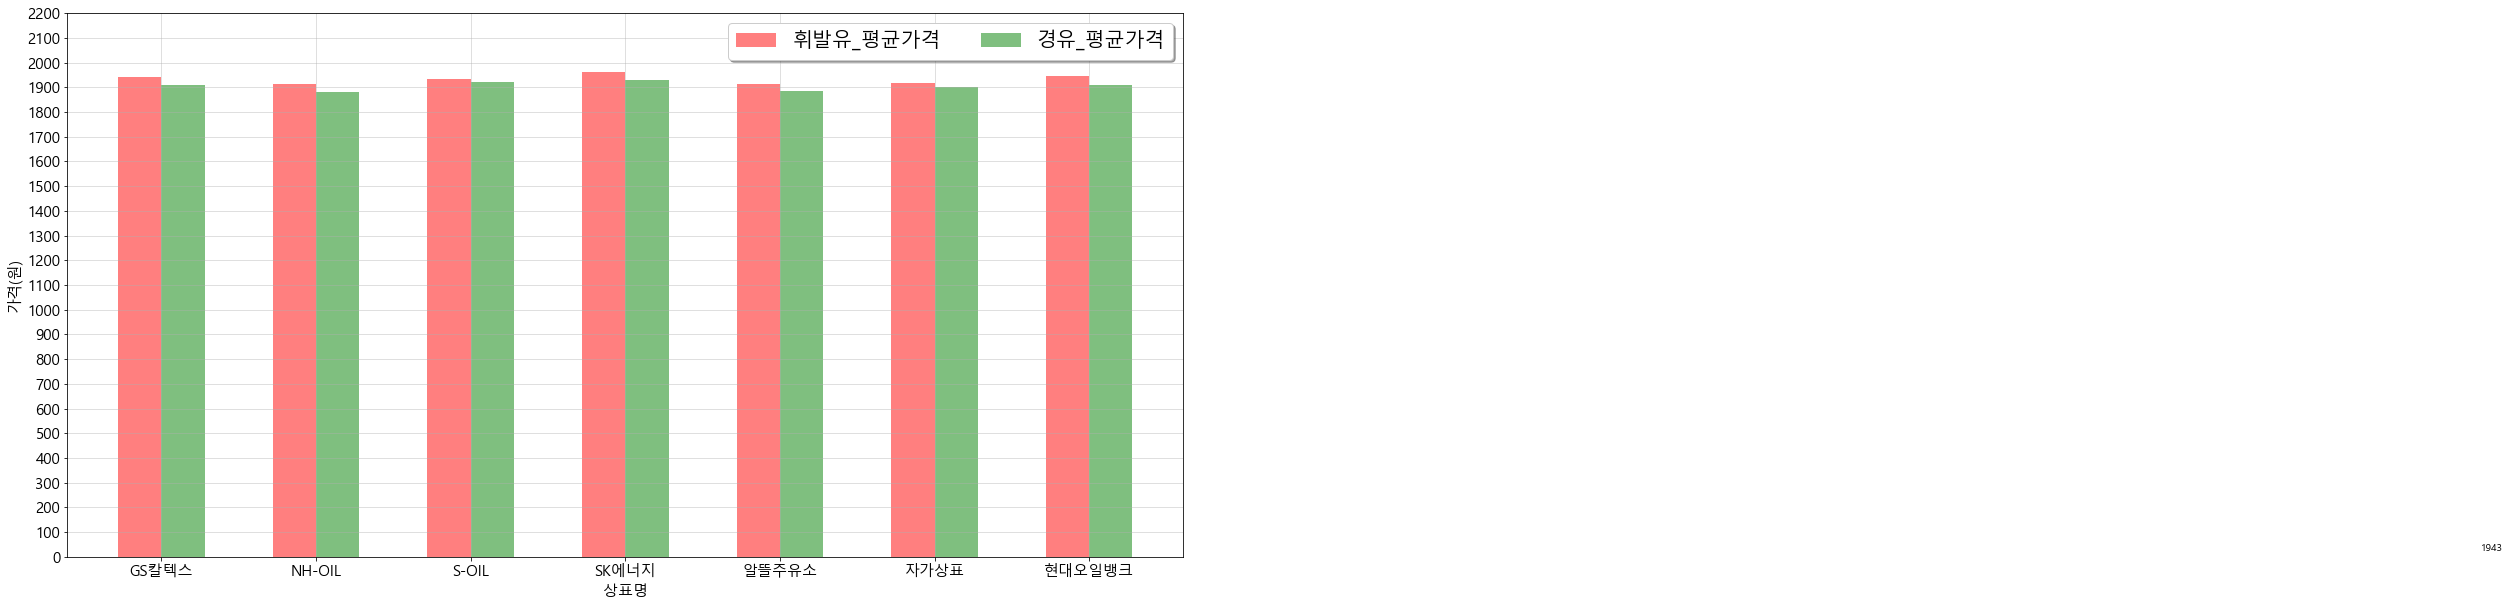

In [142]:
plt.figure(figsize=(20,10))
plt.bar(idx-w, all_brand_avg_price["휘발유_평균가격"], width=w, align="edge", color="red", alpha=0.5)
plt.bar(idx+w-0.14, all_brand_avg_price["경유_평균가격"], width=w, color="green", alpha=0.5)
plt.xticks(idx, all_brand_avg_price.index, fontsize=15) # x축
plt.yticks(np.arange(0,2300, 100), fontsize=15) # y축
plt.xlabel("상표명", fontsize=15) #x 축 이름
plt.ylabel("가격(원)", fontsize=15) # y축 이름
plt.legend(all_brand_avg_price.columns, loc="best", ncol=nrow, fontsize= 20, shadow=True) # 범례
plt.grid(alpha=0.5)
#plt.text(15, 25, all_brand_avg_price.휘발유_평균가격[0])

plt.show()

ConversionError: Failed to convert value(s) to axis units: Index(['GS칼텍스', 'NH-OIL', 'S-OIL', 'SK에너지', '알뜰주유소', '자가상표', '현대오일뱅크'], dtype='object', name='상표')

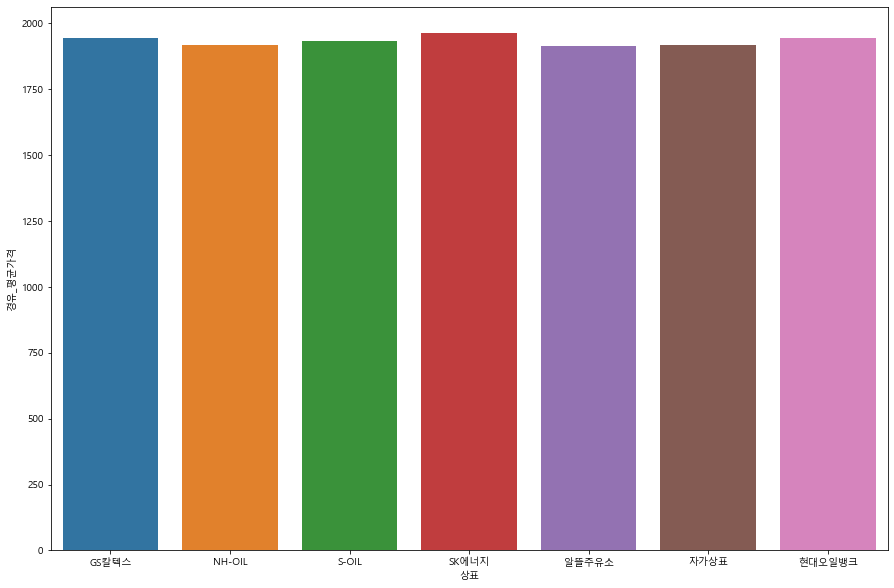

In [109]:
ax1 = all_brand_avg_price.index
ax2 = all_brand_avg_price.휘발유_평균가격
ax3 = all_brand_avg_price.경유_평균가격
ax4 = all_brand_avg_price.columns
#nrow = all_brand_avg_price.shape[0]
#ax1 = np.arange(nrow)


plt.figure(figsize=(15,10))
sns.barplot(data=all_brand_avg_price, x=ax1, y=ax2)
sns.barplot(data=all_brand_avg_price, x=ax1, y=ax3)
plt.xticks(ax1, all_brand_avg_price.index, fontsize=15)
plt.yticks(np.arange(1500,2200, 25), fontsize=15)
plt.legend()

plt.show()

#### 구별 평균 휘발유 가격 비교

#### 구별 평균 경유 가격 비교